In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import missingno as mn

In [2]:
churn_data = pd.read_csv("train_data.csv")

In [3]:
pd.options.display.max_columns = None #to display all columns
display(churn_data[0:5])

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
print(churn_data.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls', 'Churn'],
      dtype='object')


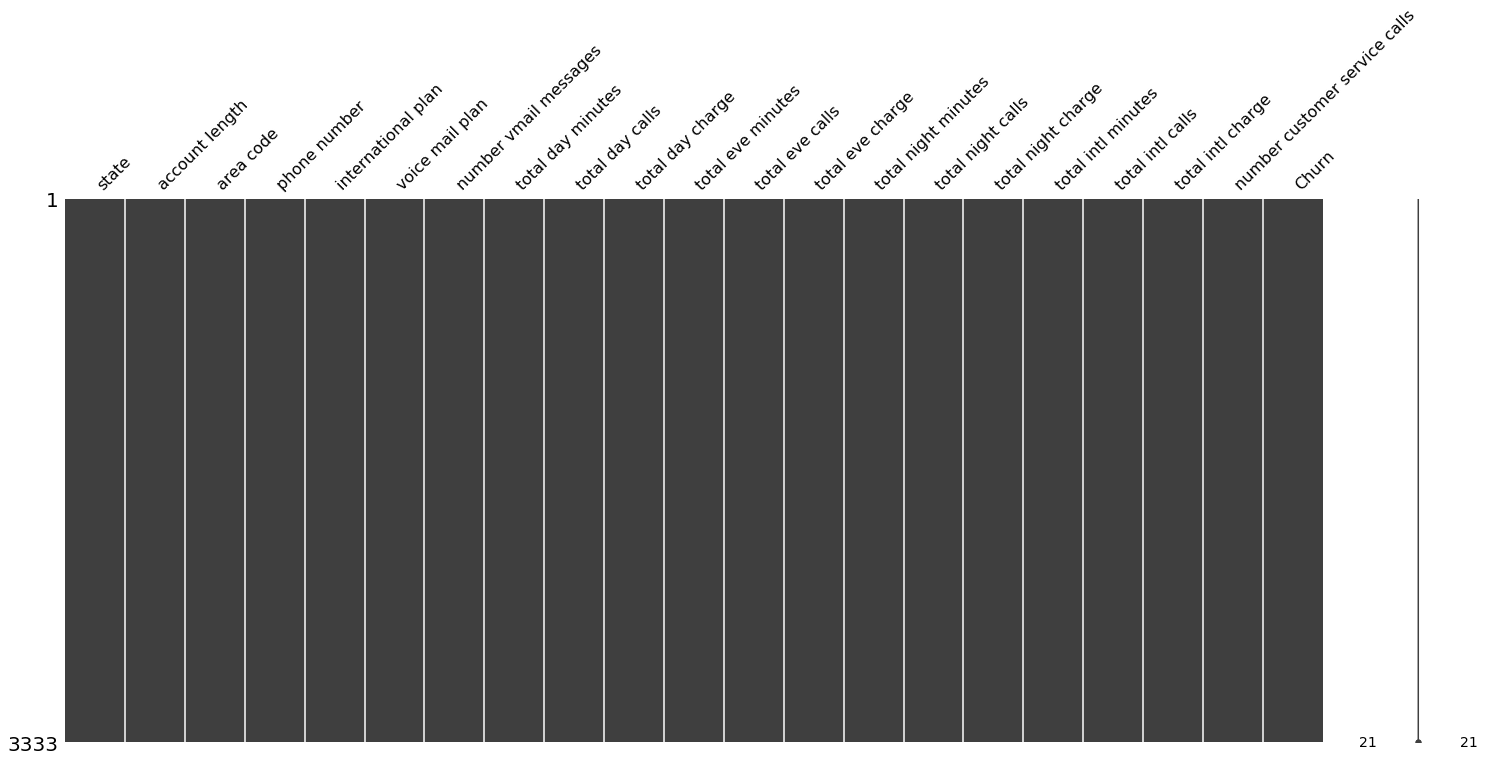

In [5]:
mn.matrix(churn_data) #ultraviolet plot to visualize the missing values

In [6]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(churn_data.isnull().sum())

In [7]:
missing_val = missing_val.rename(columns = {'index': 'Predictors', 0: 'Missing count'})
missing_val

,Missing count
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


In [8]:
churn_data.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [9]:
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls']

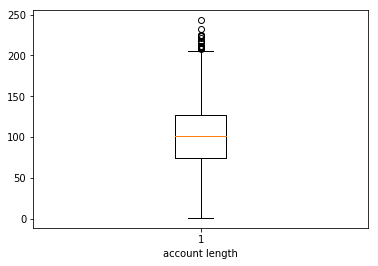

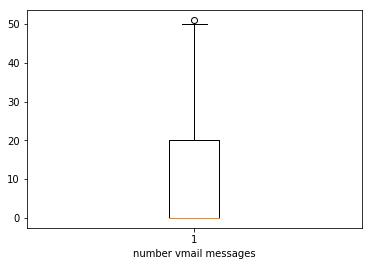

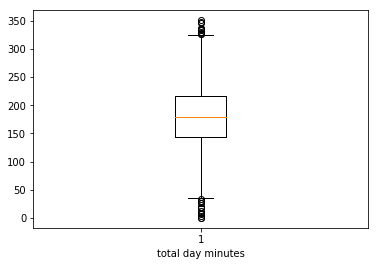

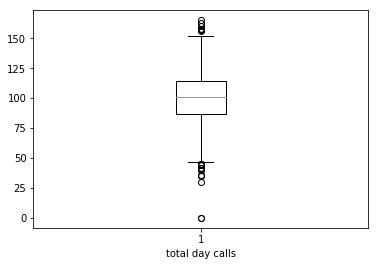

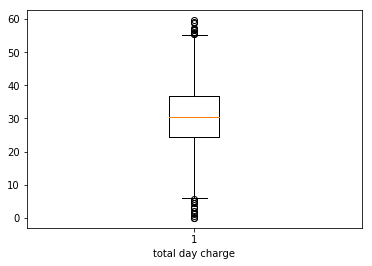

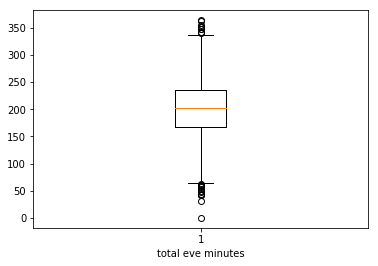

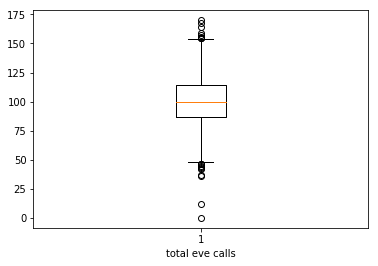

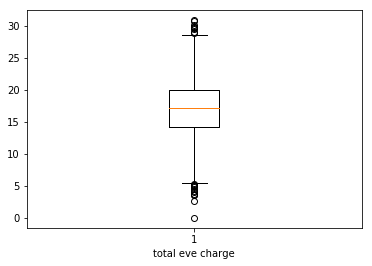

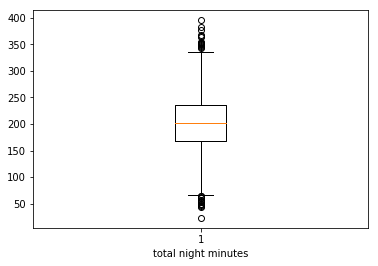

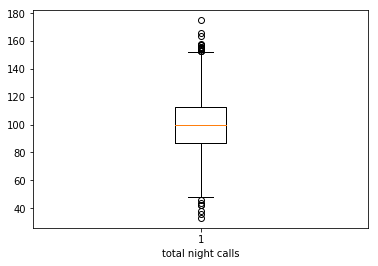

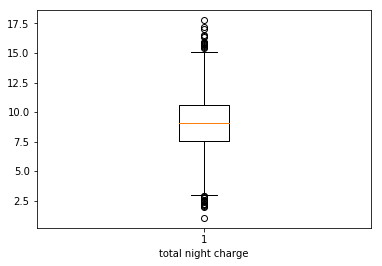

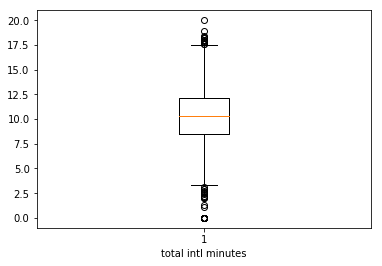

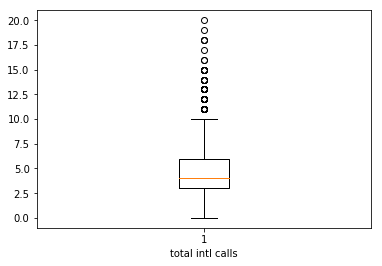

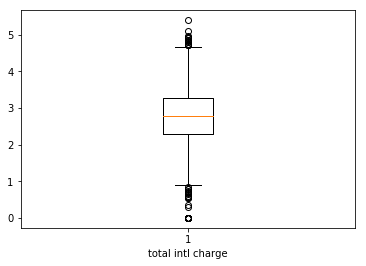

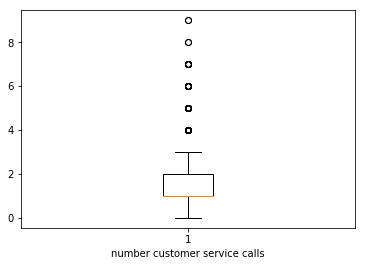

In [10]:
for i in cols:
    mpl_ax = plt.figure()
    ax = mpl_ax.add_subplot(111)
    ax.boxplot(churn_data[i])
    ax.set_xlabel(i)
    plt.show()

In [11]:
for i in cols:
    print(i)
    q75, q25 = np.percentile(churn_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min_level = q25 - (iqr*3.0) #3 times is used to eliminate absolute outliers, protects some of the data
    max_level = q75 + (iqr*3.0) # so that we have enough for training the model.
    print(min_level)
    print(max_level)
    
    churn_data = churn_data.drop(churn_data[churn_data.loc[:,i] < min_level].index)
    churn_data = churn_data.drop(churn_data[churn_data.loc[:,i] > max_level].index)

account length
-85.0
286.0
number vmail messages
-60.0
80.0
total day minutes
-74.40000000000006
434.50000000000006
total day calls
6.0
195.0
total day charge
-12.695
73.93
total eve minutes
-39.50000000000006
441.4000000000001
total eve calls
6.0
195.0
total eve charge
-3.3499999999999943
37.512499999999996
total night minutes
-38.125
440.5
total night calls
9.0
191.0
total night charge
-1.6900000000000013
19.8
total intl minutes
-2.299999999999999
22.9
total intl calls
-6.0
15.0
total intl charge
-0.6100000000000008
6.180000000000001
number customer service calls
-2.0
5.0


In [12]:
churn_data.shape[0]

3287

In [13]:
churn_corr = churn_data.loc[:,cols]

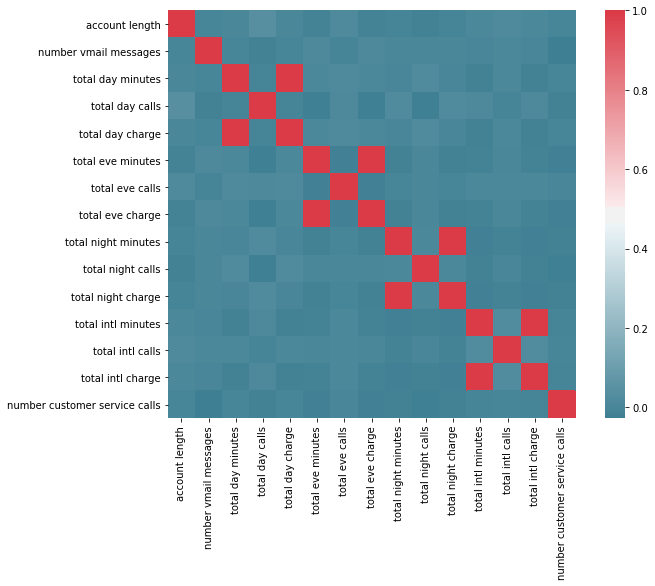

In [14]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10.5, 7.5))

#Generate correlation matrix
corr = churn_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [15]:
churn_data = churn_data.drop(['total day charge','total eve charge','total night charge','total intl charge'], axis = 1)

In [16]:
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls',
       'number customer service calls']

In [17]:
churn_corr = churn_data.loc[:,cols]

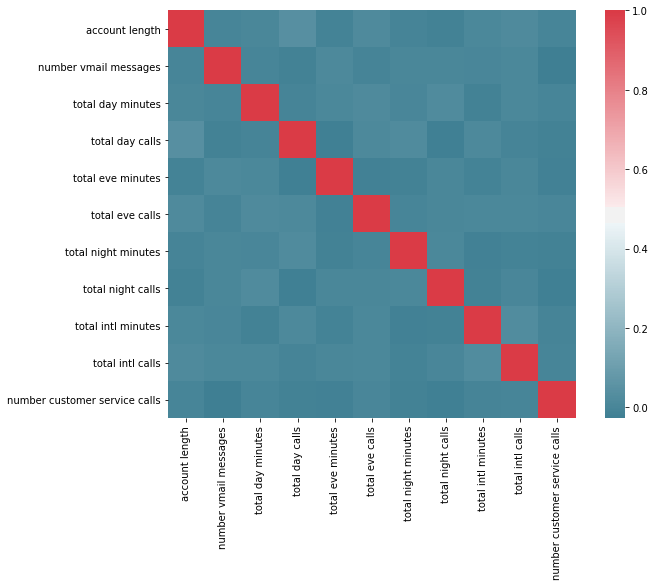

In [18]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10.5, 7.5))

#Generate correlation matrix
corr = churn_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [19]:
churn_data = churn_data.reset_index().drop(['index'], axis = 1)

In [20]:
for i in range(0,churn_data['Churn'].shape[0]):
    if churn_data['Churn'].loc[i] == ' True.':
        churn_data['Churn'].loc[i] = 'True'
    else:
        churn_data['Churn'].loc[i] = 'False'

D:\Users\ApurvKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
churn_data['Churn'].iloc[24]

'False'

In [22]:
type(churn_data['state'])

pandas.core.series.Series

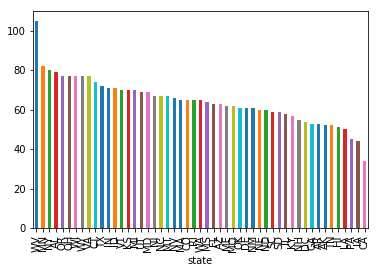

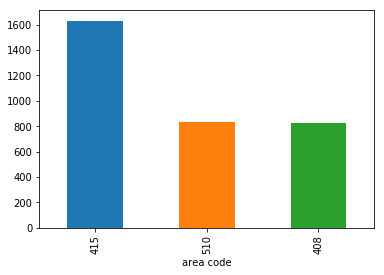

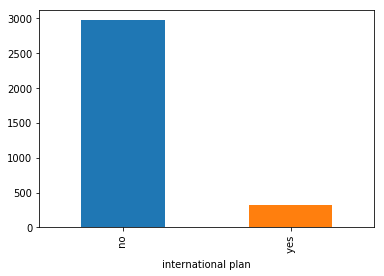

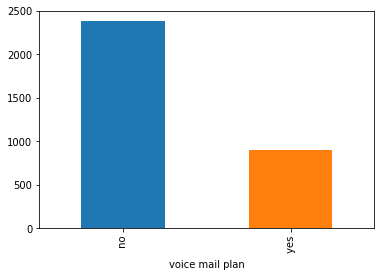

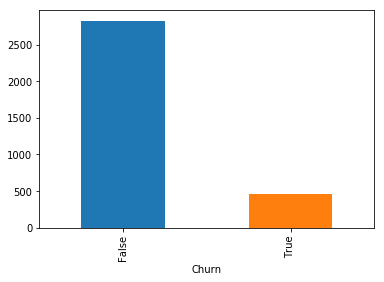

In [23]:
for i in ['state','area code','international plan','voice mail plan','Churn']:
    churn_data[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

In [24]:
cat_names = ['state','area code','international plan','voice mail plan']

In [25]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(churn_data['Churn'], churn_data[i]))
    print(p)

state
0.005772462240810621
area code
0.8391405208128838
international plan
3.453377234466883e-52
voice mail plan
1.1790993481239186e-09


In [26]:
churn_data = churn_data.drop(['area code'], axis = 1)

In [27]:
churn_data.head()

,state,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,KS,128,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [28]:
churn_data = churn_data.drop(['state','phone number'], axis = 1)

In [29]:
churn_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [30]:
cols = ['account length','international plan','voice mail plan','number vmail messages',
       'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls',
       'number customer service calls']

In [31]:
churn_data['international plan'] = churn_data['international plan'].replace(' no',0)
churn_data['international plan'] = churn_data['international plan'].replace(' yes',1)

In [32]:
churn_data['voice mail plan'] = churn_data['voice mail plan'].replace(' no',0)
churn_data['voice mail plan'] = churn_data['voice mail plan'].replace(' yes',1)

In [33]:
churn_data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [34]:
X = churn_data[cols]

In [35]:
y = churn_data['Churn']

In [36]:
logreg = LogisticRegression()

rfe = RFE(logreg,12)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True  True  True  True  True
  True]
[2 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
churn_data = churn_data.drop(['account length'], axis = 1)

In [38]:
churn_data.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,number customer service calls,Churn
0,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [39]:
cols = ['international plan','voice mail plan','number vmail messages','total day minutes','total day calls','total eve minutes','total eve calls','total night minutes','total night calls','total intl minutes','total intl calls','number customer service calls']

In [40]:
X_train = churn_data[cols]

In [41]:
y_train = churn_data['Churn']

In [42]:
test_data = pd.read_csv("Test_data.csv")

In [43]:
test_data['voice mail plan'] = test_data['voice mail plan'].replace(' no',0)
test_data['voice mail plan'] = test_data['voice mail plan'].replace(' yes',1)

In [44]:
test_data['international plan'] = test_data['international plan'].replace(' no',0)
test_data['international plan'] = test_data['international plan'].replace(' yes',1)

In [45]:
for i in range(0,test_data['Churn'].shape[0]):
    if test_data['Churn'].loc[i] == ' True.':
        test_data['Churn'].loc[i] = 'True'
    else:
        test_data['Churn'].loc[i] = 'False'

D:\Users\ApurvKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
X_test = test_data[cols]

In [47]:
y_test = test_data['Churn']

In [48]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
LR_predictions = LR_model.predict(X_test)

In [50]:
LR_model.score(X_test, y_test)

0.874625074985003

In [51]:
kfold = model_selection.KFold(n_splits=10, shuffle = True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
results.mean()

0.8673419082215137

In [52]:
confusion_Matrix = confusion_matrix(y_test, LR_predictions)
print(confusion_Matrix)

[[1418   25]
 [ 184   40]]


In [53]:
print(classification_report(y_test, LR_predictions))

             precision    recall  f1-score   support

      False       0.89      0.98      0.93      1443
       True       0.62      0.18      0.28       224

avg / total       0.85      0.87      0.84      1667



In [54]:
DT_model = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [55]:
DT_Predictions = DT_model.predict(X_test)

In [56]:
DT_model.score(X_test, y_test)

0.9196160767846431

In [57]:
kfold = model_selection.KFold(n_splits=10, shuffle = True)
modelCV = tree.DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
results.mean()

0.9154246052338942

In [58]:
confusion_Matrix = confusion_matrix(y_test, DT_Predictions)
print(confusion_Matrix)

[[1373   70]
 [  64  160]]


In [59]:
print(classification_report(y_test, DT_Predictions))

             precision    recall  f1-score   support

      False       0.96      0.95      0.95      1443
       True       0.70      0.71      0.70       224

avg / total       0.92      0.92      0.92      1667



In [60]:
DT_model.feature_importances_

array([0.07360466, 0.04694653, 0.03154599, 0.28249736, 0.02528004,
       0.14729921, 0.03114871, 0.06908103, 0.01606312, 0.11323896,
       0.07089569, 0.09239872])

In [61]:
RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train,y_train)

In [62]:
RF_Predictions = RF_model.predict(X_test)

In [63]:
RF_model.score(X_test, y_test)

0.9604079184163168

In [64]:
kfold = model_selection.KFold(n_splits=10, shuffle = True)
modelCV = RandomForestClassifier(n_estimators = 500)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
results.mean()

0.9504077396397064

In [65]:
confusion_Matrix = confusion_matrix(y_test, RF_Predictions)
print(confusion_Matrix)

[[1441    2]
 [  64  160]]


In [66]:
print(classification_report(y_test, RF_Predictions))

             precision    recall  f1-score   support

      False       0.96      1.00      0.98      1443
       True       0.99      0.71      0.83       224

avg / total       0.96      0.96      0.96      1667



In [67]:
RF_model.feature_importances_

array([0.08610019, 0.01893814, 0.03097438, 0.27473871, 0.05380523,
       0.11118731, 0.047203  , 0.06865605, 0.05137666, 0.0840358 ,
       0.06905582, 0.10392871])